# Assignment 3: Logistic Regression


## Problem statement

You are working as a Data Scientist at a Finance company which proposes home loans. When a customer applies for a home loan, the company studies his demand to decide whether he/she is eligible or not.

Your boss asks you to develop a decision-aid tool to automate the loan eligibility process. The tool is supposed to be given as input the information provided by the customer while filling his/her online loan application form. These information include customer's personal citeria such as Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, etc... To develop the algorithm/model to be applied in the tool, you are given a data set containing historical information about applicants (**features**) as well as their loan status (**output** given as binary variable indicating whether or not a the loan was approved).

![image.png](attachment:image.png)

1- Load data

In [21]:
# imports
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# show plots in the notebook
%matplotlib inline

In [22]:
# load dataset
df = pd.read_csv("loan_prediction.csv")
# shape of df
df.shape

(614, 13)

In [23]:
assert df.shape == (614, 13)

In [24]:
# head of df
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


2- Remove the "Loan_ID" column, and then transform the "Loan_Status" feature from categorical into numerical values (Y ==> 1, N ==> 0)

In [25]:
df.drop('Loan_ID', axis=1, inplace=True)
df["Loan_Status"] = df["Loan_Status"].astype("category").cat.codes

In [26]:
assert df.shape == (614, 12); assert df["Loan_Status"].dtype != 'O'

## Data Exploration

3- Build a dataframe named `stats` displaying information about df columns. The index is the columns names and the columns are the following :

* `type` : type of the column
* `# null` : number of null values
* `# unique` : number of unique values
* `unique values` : unique values, concatenated as one text separated with ` - `. If the number of unique values is greater than equal 10 (>= 10), print only the the first *20* characters followed by `...`

`stats` would look like this (only the last rows are displayed)

![](img/stats.png)

In [59]:
def unique_val(my_lst_str = []): 
    for col in df:
        if(df[col].nunique()<10) :
            # print('<10')
            list = df[col].unique().tolist()
            my_lst_str = ' - '.join(map(str, list))
            # print(my_lst_str)
            return my_lst_str
        else :
            #print('>=10')
            list = df[col].unique().tolist()
            my_lst_str = ' - '.join(map(str, list))
            # print(my_lst_str[0:20] + ' ...')
            return my_lst_str[0:20] + ' ...'

In [69]:
data = {'type': df.dtypes, '# null': df.isnull().sum(), '# unique': df.nunique()}
stats = pd.DataFrame(data)

stats['unique values'] = stats.apply(lambda row : unique_val(my_lst_str = []), axis = 1)
stats

,type,# null,# unique,unique values
Gender,object,0,2,Male - Female
Married,object,0,2,Male - Female
Dependents,object,0,4,Male - Female
Education,object,0,2,Male - Female
Self_Employed,object,0,2,Male - Female
ApplicantIncome,int64,0,405,Male - Female
CoapplicantIncome,float64,0,232,Male - Female
LoanAmount,float64,0,186,Male - Female
Loan_Amount_Term,float64,0,9,Male - Female
Credit_History,float64,0,2,Male - Female


4- Fill the null values in the column **[Married]** by the most frequent one (which is "Yes"). Then, remove all the rows containing at least one NullValue.

In [29]:
df["Married"].fillna(df["Married"].mode()[0], inplace = True)
df = df.dropna() 
print(df.shape)

(480, 12)


In [30]:
assert df.isnull().sum().sum() == 0

# Data Visualization

5-1- Plot a **bar plot** of the column **Loan_Status** (% of each class). 

loan rate = 0.6916666666666667


<AxesSubplot:title={'center':'Test'}, xlabel='Loan_Status'>

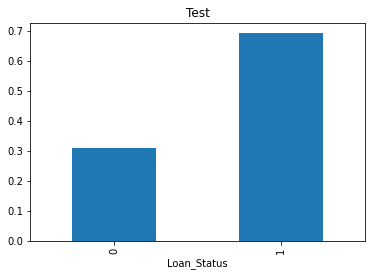

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
print ('loan rate =', df.Loan_Status.mean())
(df.groupby('Loan_Status').size()/df.shape[0]).plot(kind="bar",title="Test")

5-2- How many approved and non approved loans are there ? How much accuracy can you get if prediction is always equal to "*1*" ?

In [78]:
df2=pd.DataFrame()
df2['total']=df.groupby(column).size()
df2['loan_approved'] = df.groupby(column).sum()[Loan_Status == 1]
df2['percentage'] = round(df2['loan_approved']/df2['total']*100)
print(df2)

NameError: name 'column' is not defined

In [ ]:
# your answer here

6-1- Create a function to be named **make_bar_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a borplot of the approval rate `Loan_Status` by value of the column.

Calling `make_bar_plot` on `Property_Area` should look like this

![](img/bar_plot.png)

In [ ]:
def make_bar_plot(df, column):
    # your code here

In [ ]:
make_bar_plot(df, 'Property_Area')

6-2- Create a function to be named **make_box_plot**, which takes two parameters as input: a dataframe df (parameter 1) and a column name (parameter 2). The function must output a boxplot of the distribution of the column by `Loan_Status`.

Calling `make_box_plot` on `ApplicantIncome` should look like this

![](img/box_plot.png)

In [ ]:
def make_box_plot(df, column):  
    # your code here

In [ ]:
make_box_plot(df, 'ApplicantIncome')

6-3- Loop through df columns, except for the target and make a plot depending:

* if the column is numeric, call `make_box_plot`
* else, call `make_bar_plot`

In [ ]:
for col in # your code here:
    print(f'****************** {col} *******************')
    # your code here

# Model Training & Evaluation

7-1- Use [pandas.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) to transform `Property_Area` and `Dependents` into dummy variables

In [ ]:
# your code here

print the head of df

In [ ]:
# your code here

In [ ]:
assert df.shape == (480, 17)

7-2- Use `pandas.Categorical` (as seen in *Titanic* notebook) to transform the remaining text columns of df into numerical ones

In [ ]:
# your code here

Print the head of df

In [ ]:
# your code here

In [ ]:
assert 'object' not in [df[f].dtype for f in df.columns]

8-1 Load the target variable "Loan_Status" into a dataframe and call it y. Then, load the features into a second dataframe and call it X. 

In [ ]:
y = # your code here
X = # your code here
print (X.columns)

8-2 Split the data set into a training set and a test set. Set: test_size=0.3, random_state=123

In [ ]:
# your code here

print ("train shape", # your code here)
print ("test shape", # your code here)

8-3- Fit a logistic model to the training set, and then report the training and testing accuracies

In [ ]:
# your code here

train_score = # your code here
test_score = # your code here
print ('train accuracy =', # your code here)
print ('test accuracy =', # your code here)

9- Print the confusion matrix and compute the **precision** for class **0**, **recall** for class **1** using the formulas learned in class (you should not use metrics.classification_report)

In [ ]:
# your code here

In [ ]:
precision_0 = # your code here
recall_1 = # your code here
print ('precision_0 =', # your code here)
print ('recall_1 =',# your code here)

10- Use 5-fold [cross-validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) and choose `f1` for scoring. Print the mean and standard deviation of scores

In [ ]:
# evaluate the model using 5-fold cross-validation
# your code here
scores = # your code here
print (scores)
print ('scores mean =', '# your code here', 'scores std =', '# your code here')

how is the mean `f1_score` compared to the first one with train_test_split

Looks good. It's still performing at the same range of f1 score.